## Import the required packages and upload the excel file to the dataframe

In [7]:
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# plotting modules
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

df = pd.read_excel("telecom_users.xlsx")


## Explore the data

In [8]:
df.head()


,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Provider,Age
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No,NaN,NaN
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No,NaN,NaN
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes,NaN,NaN
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No,NaN,NaN
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,No,No,Month-to-month,No,Electronic check,53.45,119.5,No,NaN,NaN


In [9]:
df.tail()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Provider,Age
6045,3772,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,...,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95,Yes,NaN,NaN
6046,5191,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,...,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3,No,NaN,NaN
6047,5226,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,...,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No,NaN,NaN
6048,5390,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes,NaN,NaN
6049,860,4795-UXVCJ,Male,0,No,No,26,Yes,No,No,...,No internet service,No internet service,One year,No,Credit card (automatic),19.80,457.3,No,NaN,NaN


### Find the column types in the dataframe

In [10]:
df.dtypes

Unnamed: 0            int64
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
Provider            float64
Age                 float64
dtype: object

## Data Cleansing


### Look for null values

In [11]:
df.isnull().sum()

Unnamed: 0             0
customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn                  0
Provider            6050
Age                 6050
dtype: int64

### This shows two columns with NaN across the dataframe. I am dropping these two columns as they are not  required 

In [12]:
df.drop(columns=['Provider', 'Age'], inplace=True)
df.head(5)

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


### I change the TotalCharges column type from object to float so I can use the field in my analysis 

In [13]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan).astype(float)

### Checking the types to see if the update to float on TotalChargers column has taken place

In [14]:
df.dtypes

Unnamed: 0            int64
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

### Dropping an additional column called Unamed: 0 as I can't see any useful need for it my analysis

In [15]:
df.drop('Unnamed: 0', axis=1, inplace=True)

## Data Exploration - Non Senior Citizens

### Total Male Subscribers (which are not Senior Citizens) with a Phone Service

In [16]:
df_filtered_phone_male = df.query("gender == 'Male' and SeniorCitizen == 0 and PhoneService == 'Yes'")
total = df_filtered_phone_male.shape[0]
print(total)

2336


### Total Male Subscribers (which are not Senior Citizens) with a Internet Service

In [17]:
df_filtered_internet_male = df.query("gender == 'Male' and SeniorCitizen == 0 and InternetService in ['DSL', 'Fiber optic']")
total = df_filtered_internet_male.shape[0]
print(total)

1947


### Total Male Subscribers (which are not Senior Citizens) with Device Protection

In [18]:
df_filtered_device_male = df.query("gender == 'Male' and SeniorCitizen == 0 and DeviceProtection == 'Yes'")
total = df_filtered_device_male.shape[0]
print(total)

858


### Total Male Subscribers (which are not Senior Citizens) with Streaming TV Service

In [19]:
df_filtered_streaming_male = df.query("gender == 'Male' and SeniorCitizen == 0 and StreamingTV == 'Yes'")
total = df_filtered_streaming_male.shape[0]
print(total)

933


### Total Male Subscribers (which are not Senior Citizens) with Paperless Billing

In [20]:
df_filtered_paperless_male = df.query("gender == 'Male' and SeniorCitizen == 0 and PaperlessBilling == 'Yes'")
total = df_filtered_paperless_male.shape[0]
print(total)

1424


### Total Female Subscribers (which are not Senior Citizens) with a Phone Service

In [21]:
df_filtered_phone_female = df.query("gender == 'Female' and SeniorCitizen == 0 and PhoneService == 'Yes'")
total = df_filtered_phone_female.shape[0]
print(total)

2224


### Total Female Subscribers (which are not Senior Citizens) with a Internet Service

In [22]:
df_filtered_internet_female = df.query("gender == 'Female' and SeniorCitizen == 0 and InternetService in ['DSL', 'Fiber optic']")
total = df_filtered_internet_female.shape[0]
print(total)

1863


### Total Female Subscribers (which are not Senior Citizens) with Device Protection

In [23]:
df_filtered_device_female = df.query("gender == 'Female' and SeniorCitizen == 0 and DeviceProtection == 'Yes'")
total = df_filtered_device_female.shape[0]
print(total)

817


### Total Female Subscribers (which are not Senior Citizens) with Streaming TV Service

In [24]:
df_filtered_streaming_female = df.query("gender == 'Female' and SeniorCitizen == 0 and StreamingTV == 'Yes'")
total = df_filtered_streaming_female.shape[0]
print(total)

907


### Total Female Subscribers (which are not Senior Citizens) with Paperless Billing

In [25]:
df_filtered_paperless_female = df.query("gender == 'Female' and SeniorCitizen == 0 and PaperlessBilling == 'Yes'")
total = df_filtered_paperless_female.shape[0]
print(total)

1401


### A Comparison of two histograms Total Male and Female Subscribers (which are not Senior Citizens) with a Phone Service vs Monthly Charges 

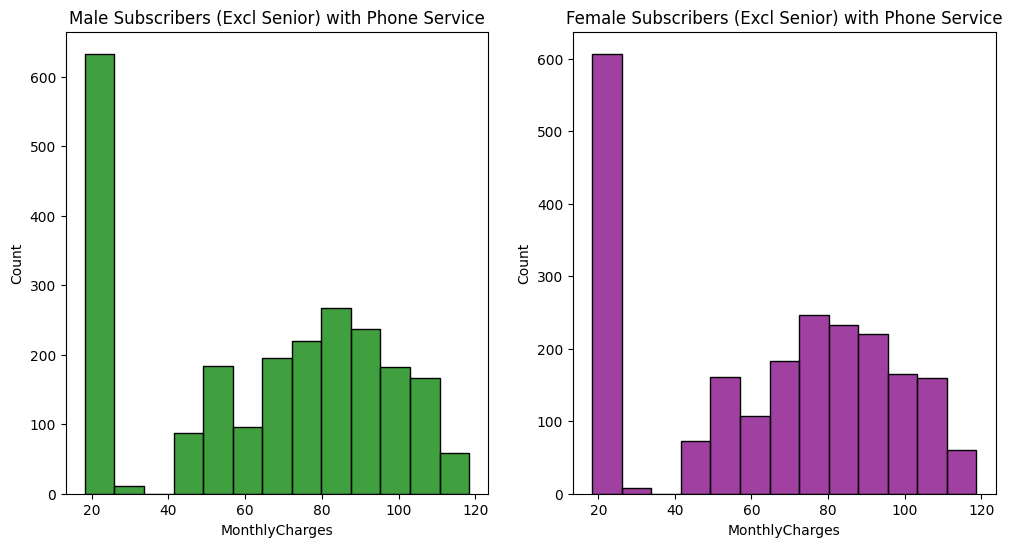

In [26]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Create a histogram of the 'MonthlyCharges' column for male customers
sns.histplot(data=df_filtered_phone_male, x='MonthlyCharges', color='green', ax=ax1)
ax1.set_title('Male Subscribers (Excl Senior) with Phone Service')

# Create a histogram of the 'MonthlyCharges' column for female customers
sns.histplot(data=df_filtered_phone_female, x='MonthlyCharges', color='purple', ax=ax2)
ax2.set_title('Female Subscribers (Excl Senior) with Phone Service')

# Show the plot
plt.show()


Based on the side-by-side comparison of the histograms, it appears that there are some differences and similarities in the distributions of monthly charges for male and female subscribers with a phone service. 

For male subscribers, the highest count of around 650 is for monthly charges of approximately £20, while their second highest count of around 280 is for monthly charges of approximately £85. 

For female subscribers, the highest count of around 600 is for monthly charges of approximately £20, while their second highest count of around 250 is for monthly charges of approximately £75. 

These figures suggest that both male and female subscribers have similar distributions of monthly charges, with the majority having monthly charges of around £20 for the Phone Service.


### A Comparison of two histograms Total Male and Female Subscribers (which are not Senior Citizens) with a Internet Service vs Monthly Charges

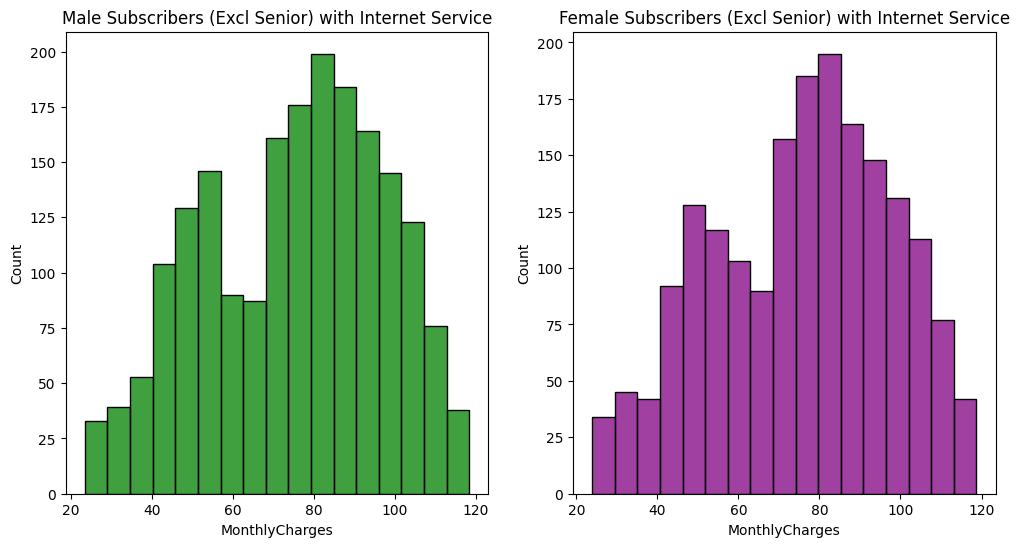

In [27]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Create a histogram of the 'MonthlyCharges' column for male customers
sns.histplot(data=df_filtered_internet_male, x='MonthlyCharges', color='green', ax=ax1)
ax1.set_title('Male Subscribers (Excl Senior) with Internet Service')

# Create a histogram of the 'MonthlyCharges' column for female customers
sns.histplot(data=df_filtered_internet_female, x='MonthlyCharges', color='purple', ax=ax2)
ax2.set_title('Female Subscribers (Excl Senior) with Internet Service')

# Show the plot
plt.show()


Based on the side-by-side comparison of the histograms, it appears that there are some differences and similarities in the distributions of monthly charges for male and female subscribers with a internet service. 

For male subscribers, the highest count of around 200 is for monthly charges of approximately £85, while their second highest count of around 175 is for monthly charges of approximately £90. 

For female subscribers, the highest count of around 190 is for monthly charges of approximately £85, while their second highest count of around 180 is for monthly charges of approximately £80. 

These figures suggest that both male and female subscribers have similar distributions of monthly charges, with the majority having monthly charges of around £85 for the Internet Service.

### A Comparison of two histograms Total Male and Female Subscribers (which are not Senior Citizens) with a Device Protection vs Monthly Charges

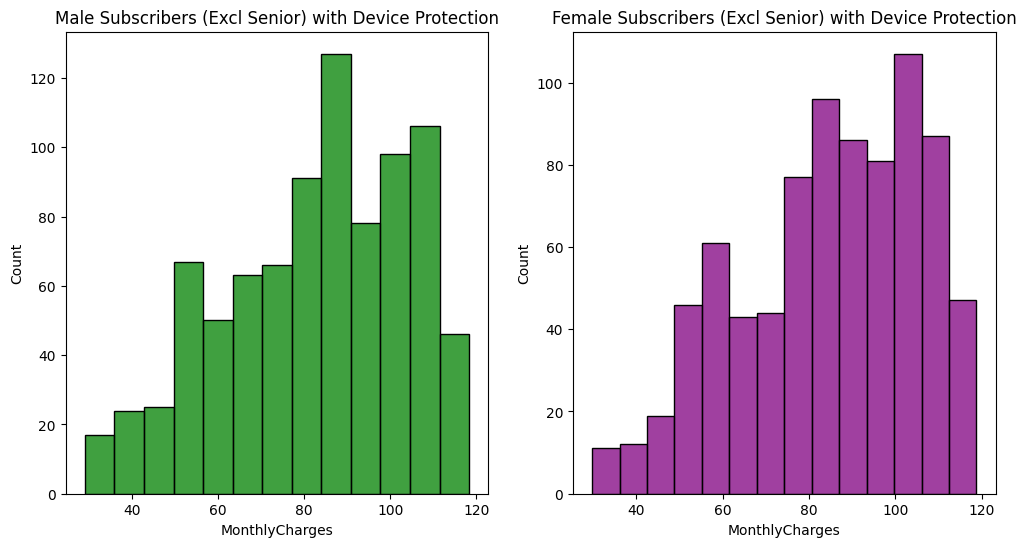

In [28]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Create a histogram of the 'MonthlyCharges' column for male customers
sns.histplot(data=df_filtered_device_male, x='MonthlyCharges', color='green', ax=ax1)
ax1.set_title('Male Subscribers (Excl Senior) with Device Protection')

# Create a histogram of the 'MonthlyCharges' column for female customers
sns.histplot(data=df_filtered_device_female, x='MonthlyCharges', color='purple', ax=ax2)
ax2.set_title('Female Subscribers (Excl Senior) with Device Protection')

# Show the plot
plt.show()


Based on the side-by-side comparison of the histograms, it appears that there are some differences and similarities in the distributions of monthly charges for male and female subscribers with Device Protection. 

For male subscribers, the highest count of around 130 is for monthly charges of approximately £85, while their second highest count of around 100 is for monthly charges of approximately £110. 

For female subscribers, the highest count of around 110 is for monthly charges of approximately £100, while their second highest count of around 90 is for monthly charges of approximately £85. 

These figures suggest that male subscribers have a slightly higher count when monthly charges are lower, while female subscribers have a higher count when monthly charges are higher for Device Protection. This could indicate that female subscribers are more willing to pay higher monthly charges for Device Protection than male subscribers.

### A Comparison of two histograms Total Male and Female Subscribers (which are not Senior Citizens) with a Streaming TV vs Monthly Charges

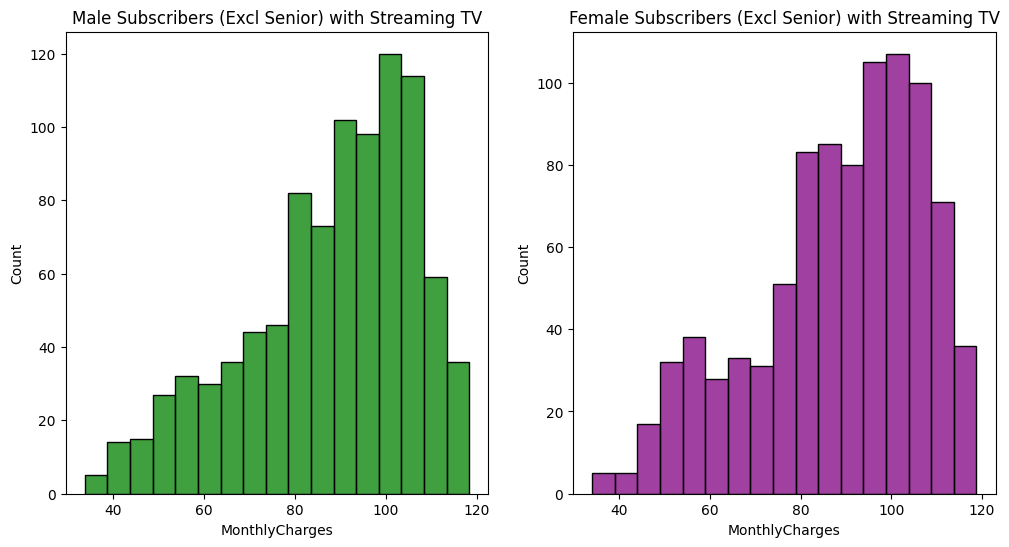

In [29]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Create a histogram of the 'MonthlyCharges' column for male customers
sns.histplot(data=df_filtered_streaming_male, x='MonthlyCharges', color='green', ax=ax1)
ax1.set_title('Male Subscribers (Excl Senior) with Streaming TV')

# Create a histogram of the 'MonthlyCharges' column for female customers
sns.histplot(data=df_filtered_streaming_female, x='MonthlyCharges', color='purple', ax=ax2)
ax2.set_title('Female Subscribers (Excl Senior) with Streaming TV')

# Show the plot
plt.show()


Based on the side-by-side comparison of the histograms, it appears that there are some differences and similarities in the distributions of monthly charges for male and female subscribers with Streaming TV Service. 

For male subscribers, the highest count of around 120 is for monthly charges of approximately £100, while their second highest count of around 110 is for monthly charges of approximately £110. 

For female subscribers, the highest count of around 105 is for monthly charges of approximately £100, while their second highest count of around 100 is for monthly charges of approximately £95. 

This could indicate that Streaming TV Service is a popular service among both male and female subscribers, and that both groups are willing to pay similar monthly charges for this service. The upward trend in Monthly Charges could suggest that this is a growing area of interest for non senior citizens.

### A Comparison of two histograms Total Male and Female Subscribers (which are not Senior Citizens) with a Paperless billing vs Monthly Charges

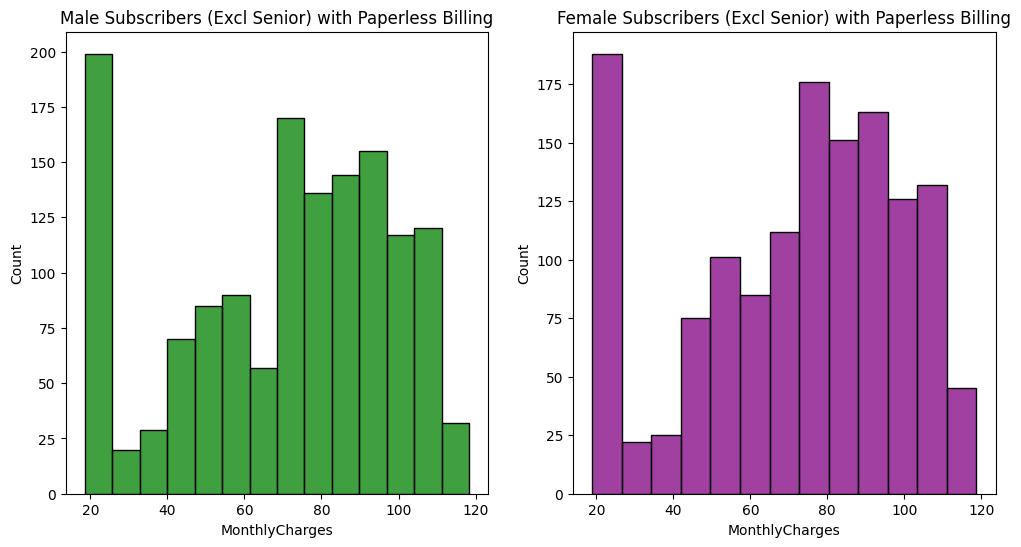

In [30]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Create a histogram of the 'MonthlyCharges' column for male customers
sns.histplot(data=df_filtered_paperless_male, x='MonthlyCharges', color='green', ax=ax1)
ax1.set_title('Male Subscribers (Excl Senior) with Paperless Billing')

# Create a histogram of the 'MonthlyCharges' column for female customers
sns.histplot(data=df_filtered_paperless_female, x='MonthlyCharges', color='purple', ax=ax2)
ax2.set_title('Female Subscribers (Excl Senior) with Paperless Billing')

# Show the plot
plt.show()


Based on the side-by-side comparison of the histograms, it appears that there are some differences and similarities in the distributions of monthly charges for male and female subscribers with Paperless Billing. 

For male subscribers, the highest count of around 200 is for monthly charges of approximately £20, while their second highest count of around 175 is for monthly charges of approximately £75. 

For female subscribers, the highest count of around 180 is for monthly charges of approximately £20, while their second highest count of around 175 is for monthly charges of approximately £75. 

These figures suggest that both male and female subscribers have similar distributions of monthly charges, with the majority having monthly charges of around £20 for the Paperless Billing.

### Comparing the Male and Female Subscribers (which are not Senior Citizens) with Phone Service

In [31]:
# Calculate the number of rows in each DataFrame
female_count_phone = df_filtered_phone_female.shape[0]
male_count_phone = df_filtered_phone_male.shape[0]

# Calculate the difference in counts
count_difference_phone = abs(female_count_phone - male_count_phone)

# Print the result
print(f"Female count: {female_count_phone}")
print(f"Male count: {male_count_phone}")
print(f"Difference in counts: {count_difference_phone}")

Female count: 2224
Male count: 2336
Difference in counts: 112


### Creating a Barplot using Seaborn to visualise the Comparison with Phone Service

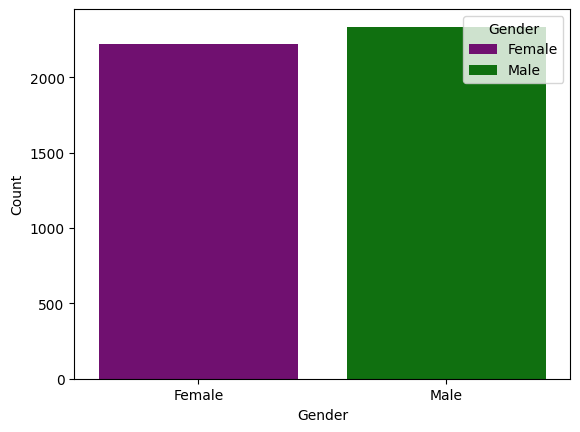

In [32]:
# Create a DataFrame with the counts
counts = pd.DataFrame({'Gender': ['Female', 'Male'], 'Count': [female_count_phone, male_count_phone]})

# Create a bar chart of the counts
sns.barplot(x='Gender', y='Count', data=counts, dodge=False, hue='Gender', palette={'Female':'purple','Male':'green'})

# Show the plot
plt.show()

### Comparing the Male and Female Subscribers (which are not Senior Citizens) with Internet Service

In [33]:
# Calculate the number of rows in each DataFrame
female_count_internet = df_filtered_internet_female.shape[0]
male_count_internet = df_filtered_internet_male.shape[0]

# Calculate the difference in counts
count_difference_internet = abs(female_count_internet - male_count_internet)

# Print the result
print(f"Female count: {female_count_internet}")
print(f"Male count: {male_count_internet}")
print(f"Difference in counts: {count_difference_internet}")

Female count: 1863
Male count: 1947
Difference in counts: 84


### Creating a Barplot using Seaborn to visualise the Comparison with Internet Service

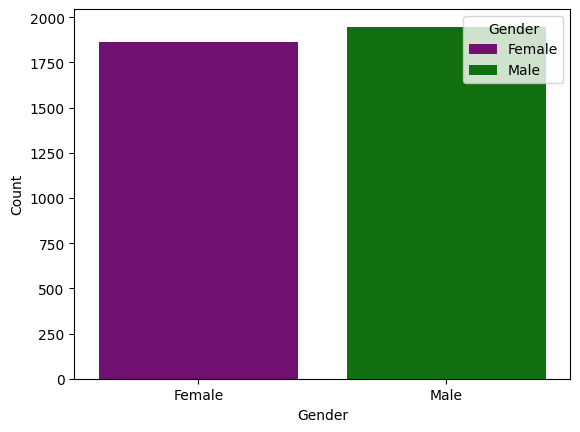

In [34]:
# Create a DataFrame with the counts
counts = pd.DataFrame({'Gender': ['Female', 'Male'], 'Count': [female_count_internet, male_count_internet]})

# Create a bar chart of the counts
sns.barplot(x='Gender', y='Count', data=counts, dodge=False, hue='Gender', palette={'Female':'purple','Male':'green'})

# Show the plot
plt.show()

### Comparing the Male and Female Subscribers (which are not Senior Citizens) with Device Protection

In [35]:
# Calculate the number of rows in each DataFrame
female_count_device = df_filtered_device_female.shape[0]
male_count_device = df_filtered_device_male.shape[0]

# Calculate the difference in counts
count_difference_device = abs(female_count_device - male_count_device)

# Print the result
print(f"Female count: {female_count_device}")
print(f"Male count: {male_count_device}")
print(f"Difference in counts: {count_difference_device}")

Female count: 817
Male count: 858
Difference in counts: 41


### Creating a Barplot using Seaborn to visualise the Comparison with Device Protection

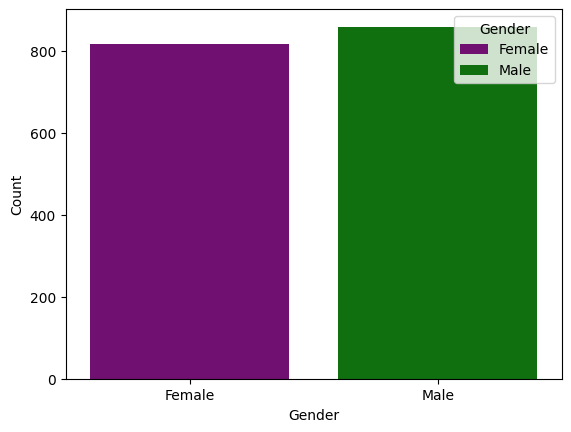

In [36]:
# Create a DataFrame with the counts
counts = pd.DataFrame({'Gender': ['Female', 'Male'], 'Count': [female_count_device, male_count_device]})

# Create a bar chart of the counts
sns.barplot(x='Gender', y='Count', data=counts, dodge=False, hue='Gender', palette={'Female':'purple','Male':'green'})

# Show the plot
plt.show()

### Comparing the Male and Female Subscribers (which are not Senior Citizens) with Streaming TV Service

In [37]:
# Calculate the number of rows in each DataFrame
female_count_streaming = df_filtered_streaming_female.shape[0]
male_count_streaming = df_filtered_streaming_male.shape[0]

# Calculate the difference in counts
count_difference_streaming = abs(female_count_streaming - male_count_streaming)

# Print the result
print(f"Female count: {female_count_streaming}")
print(f"Male count: {male_count_streaming}")
print(f"Difference in counts: {count_difference_streaming}")

Female count: 907
Male count: 933
Difference in counts: 26


### Creating a Barplot using Seaborn to visualise the Comparison with Streaming TV Service

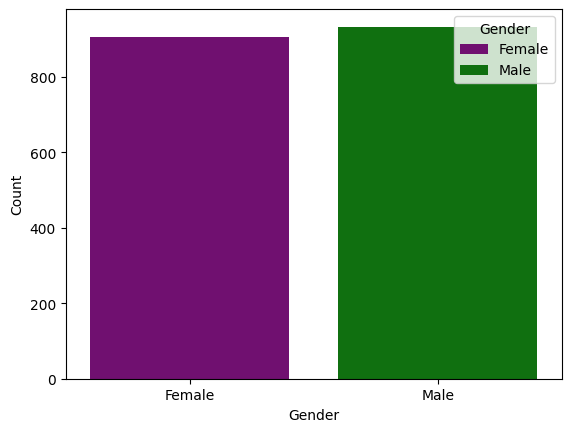

In [38]:
# Create a DataFrame with the counts
counts = pd.DataFrame({'Gender': ['Female', 'Male'], 'Count': [female_count_streaming, male_count_streaming]})

# Create a bar chart of the counts
sns.barplot(x='Gender', y='Count', data=counts, dodge=False, hue='Gender', palette={'Female':'purple','Male':'green'})

# Show the plot
plt.show()

### Comparing the Male and Female Subscribers (which are not Senior Citizens) with Paperless Billing

In [39]:
# Calculate the number of rows in each DataFrame
female_count_paperless = df_filtered_paperless_female.shape[0]
male_count_paperless = df_filtered_paperless_male.shape[0]

# Calculate the difference in counts
count_difference_paperless = abs(female_count_paperless - male_count_paperless)

# Print the result
print(f"Female count: {female_count_paperless}")
print(f"Male count: {male_count_paperless}")
print(f"Difference in counts: {count_difference_paperless}")

Female count: 1401
Male count: 1424
Difference in counts: 23


### Creating a Barplot using Seaborn to visualise the Comparison with Paperless Billing

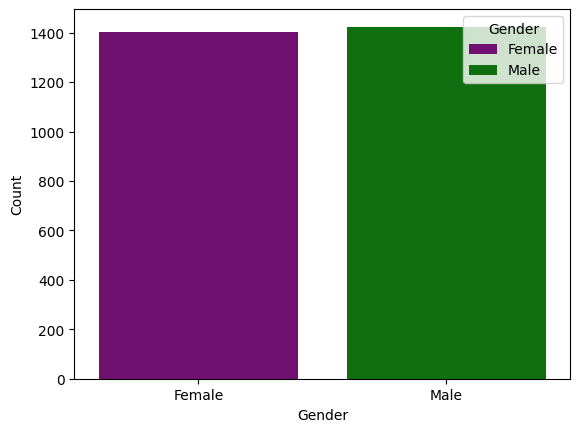

In [40]:
# Create a DataFrame with the counts
counts = pd.DataFrame({'Gender': ['Female', 'Male'], 'Count': [female_count_paperless, male_count_paperless]})

# Create a bar chart of the counts
sns.barplot(x='Gender', y='Count', data=counts, dodge=False, hue='Gender', palette={'Female':'purple','Male':'green'})

# Show the plot
plt.show()

## Data Exploration - Senior Citizens

### Total Count of Subscribers that are Senior Citizens and not Senior Citizens

In [41]:
senior = df.groupby('SeniorCitizen')['TotalCharges'].count()
senior = senior.rename({0: 'Not a senior citizen', 1: 'Yes they are a senior citizen'})
print(senior)

SeniorCitizen
Not a senior citizen             5059
Yes they are a senior citizen     981
Name: TotalCharges, dtype: int64


### Bar Plot of Total Count of Subscribers that are Senior Citizens and not Senior Citizens

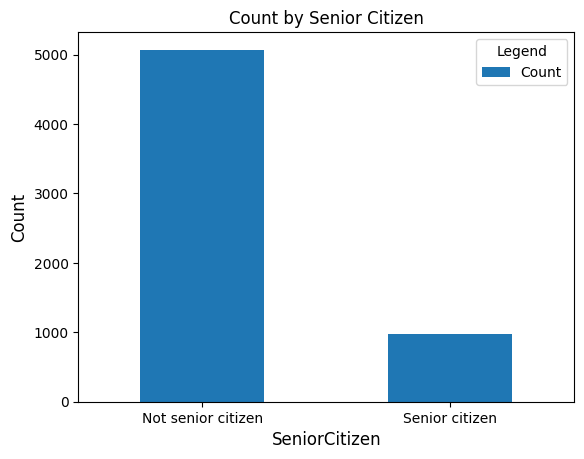

In [42]:
ax = df['SeniorCitizen'].value_counts().rename({0: 'Not senior citizen', 1: 'Senior citizen'}).plot(kind='bar', rot=0, title='Count by Senior Citizen')
ax.set_xlabel('SeniorCitizen', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
plt.legend(['Count'], loc='upper right', title='Legend')
plt.show()

### Pie of Total Count of Subscribers that are Senior Citizens and not Senior Citizens

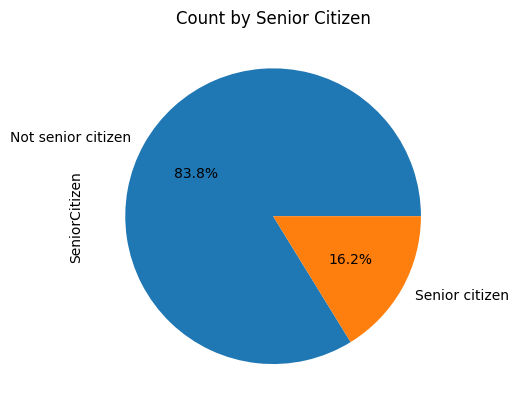

In [43]:
ax = df['SeniorCitizen'].value_counts().rename({0: 'Not senior citizen', 1: 'Senior citizen'}).plot(kind='pie', autopct='%.1f%%', rot=0, title='Count by Senior Citizen')
plt.show()

### Percentage check of Senior Citizens in the dataframe

In [44]:
# Calculate the number of rows for each value of the 'SeniorCitizen' column
senior_counts = df['SeniorCitizen'].value_counts()

# Calculate the total number of rows
total = senior_counts.sum()

# Calculate the percentage of senior citizens
senior_percentage = senior_counts[1] / total * 100

# Print the result
print(f"Percentage of senior citizens: {senior_percentage:.2f}%")

Percentage of senior citizens: 16.21%


### Total Count of Subscribers that are Senior Citizens and Male

In [45]:
df_filtered_male_senior = df.query("gender == 'Male' and SeniorCitizen == 1")
total = df_filtered_male_senior.shape[0]
print(total)

490


### Total Count of Subscribers that are Senior Citizens and Male with Phone Service

In [46]:
df_filtered_phone_male_senior = df.query("gender == 'Male' and SeniorCitizen == 1 and PhoneService == 'Yes'")
total = df_filtered_phone_male_senior.shape[0]
print(total)

438


### Total Count of Subscribers that are Senior Citizens and Male with Internet Service

In [47]:
df_filtered_internet_male_senior = df.query("gender == 'Male' and SeniorCitizen == 1 and InternetService in ['DSL', 'Fiber optic']")
total = df_filtered_internet_male_senior.shape[0]
print(total)

464


### Total Count of Subscribers that are Senior Citizens and Male with Device Protection

In [48]:
df_filtered_device_male_senior = df.query("gender == 'Male' and SeniorCitizen == 1 and DeviceProtection == 'Yes'")
total = df_filtered_device_male_senior.shape[0]
print(total)

194


### Total Count of Subscribers that are Senior Citizens and Male with Streaming TV Service

In [49]:
df_filtered_streaming_male_senior = df.query("gender == 'Male' and SeniorCitizen == 1 and StreamingTV == 'Yes'")
total = df_filtered_streaming_male_senior.shape[0]
print(total)

239


### Total Count of Subscribers that are Senior Citizens and Male with Paperless Billing

In [50]:
df_filtered_paperless_male_senior = df.query("gender == 'Male' and SeniorCitizen == 1 and PaperlessBilling == 'Yes'")
total = df_filtered_paperless_male_senior.shape[0]
print(total)

373


### Total Count of Subscribers that are Senior Citizens and Female

In [51]:
df_filtered_male_senior = df.query("gender == 'Female' and SeniorCitizen == 1")
total = df_filtered_male_senior.shape[0]
print(total)

491


### Total Count of Subscribers that are Senior Citizens and Female with Phone Service

In [52]:
df_filtered_phone_female_senior = df.query("gender == 'Female' and SeniorCitizen == 1 and PhoneService == 'Yes'")
total = df_filtered_phone_female_senior.shape[0]
print(total)

454


### Total Count of Subscribers that are Senior Citizens and Female with Internet Service

In [53]:
df_filtered_internet_female_senior = df.query("gender == 'Female' and SeniorCitizen == 1 and InternetService in ['DSL', 'Fiber optic']")
total = df_filtered_internet_female_senior.shape[0]
print(total)

476


### Total Count of Subscribers that are Senior Citizens and Female with Device Protection

In [54]:
df_filtered_device_female_senior = df.query("gender == 'Female' and SeniorCitizen == 1 and DeviceProtection == 'Yes'")
total = df_filtered_device_female_senior.shape[0]
print(total)

211


### Total Count of Subscribers that are Senior Citizens and Female with Streaming TV Service

In [55]:
df_filtered_streaming_female_senior = df.query("gender == 'Female' and SeniorCitizen == 1 and StreamingTV == 'Yes'")
total = df_filtered_streaming_female_senior.shape[0]
print(total)

253


### Total Count of Subscribers that are Senior Citizens and Female with Paperless Billing

In [56]:
df_filtered_paperless_female_senior = df.query("gender == 'Female' and SeniorCitizen == 1 and PaperlessBilling == 'Yes'")
total = df_filtered_paperless_female_senior.shape[0]
print(total)

375


### A Comparison of two histograms Total Male and Female Subscribers (Senior Citizens) with a Phone Service vs Monthly Charges

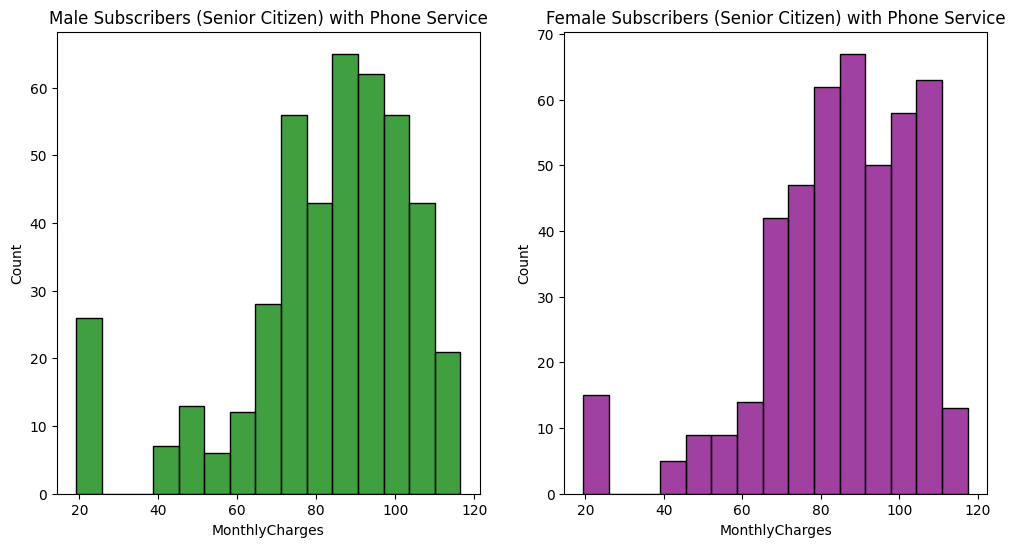

In [57]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Create a histogram of the 'MonthlyCharges' column for male customers
sns.histplot(data=df_filtered_phone_male_senior, x='MonthlyCharges', color='green', ax=ax1)
ax1.set_title('Male Subscribers (Senior Citizen) with Phone Service')

# Create a histogram of the 'MonthlyCharges' column for female customers
sns.histplot(data=df_filtered_phone_female_senior, x='MonthlyCharges', color='purple', ax=ax2)
ax2.set_title('Female Subscribers (Senior Citizen) with Phone Service')

# Show the plot
plt.show()

Based on the side-by-side comparison of the histograms, it appears that there are some differences and similarities in the distributions of monthly charges for male and female senior citizen subscribers with a phone service. 

For male subscribers, the highest count of around 65 is for monthly charges of approximately £85, while their second highest count of around 60 is for monthly charges of approximately £90. 

For female subscribers, the highest count of around 70 is for monthly charges of approximately £85, while their second highest count of around 60 is for monthly charges of approximately £80. 

These figures suggest that both male and female subscribers have similar distributions of monthly charges, with the majority having monthly charges of around £85 for the Phone Service. This could indicate that Phone Service is a popular service among both male and female senior subscribers, and that both groups are willing to pay similar monthly charges for this service.

### A Comparison of two histograms Total Male and Female Subscribers (Senior Citizens) with a Internet Service vs Monthly Charges

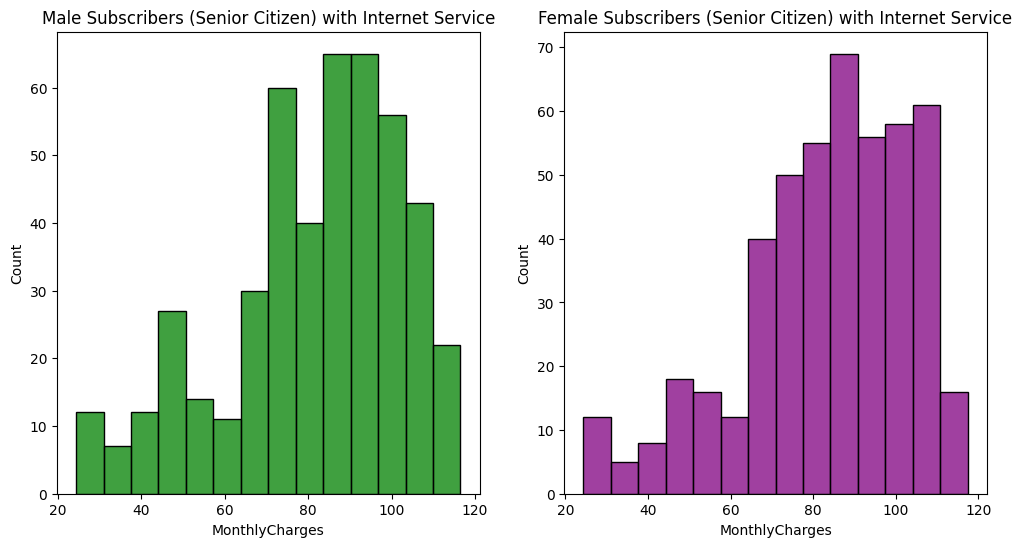

In [58]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Create a histogram of the 'MonthlyCharges' column for male customers
sns.histplot(data=df_filtered_internet_male_senior, x='MonthlyCharges', color='green', ax=ax1)
ax1.set_title('Male Subscribers (Senior Citizen) with Internet Service')

# Create a histogram of the 'MonthlyCharges' column for female customers
sns.histplot(data=df_filtered_internet_female_senior, x='MonthlyCharges', color='purple', ax=ax2)
ax2.set_title('Female Subscribers (Senior Citizen) with Internet Service')

# Show the plot
plt.show()

Based on the side-by-side comparison of the histograms, it appears that there are some differences and similarities in the distributions of monthly charges for male and female senior citizen subscribers with a internet service.

For male subscribers, the highest count of around 65 is for monthly charges of approximately £100, while their second highest count of around 65 is for monthly charges of approximately £95.

For female subscribers, the highest count of around 70 is for monthly charges of approximately £85, while their second highest count of around 60 is for monthly charges of approximately £110.

These figures suggest that female subscribers have a higher count of subscribers when monthly charges are lower, while male subscribers have a higher count when monthly charges are higher for an internet service. This could indicate that female subscribers are more sensitive to price changes for an internet service than male subscribers.

### A Comparison of two histograms Total Male and Female Subscribers (Senior Citizens) with Device Protection vs Monthly Charges

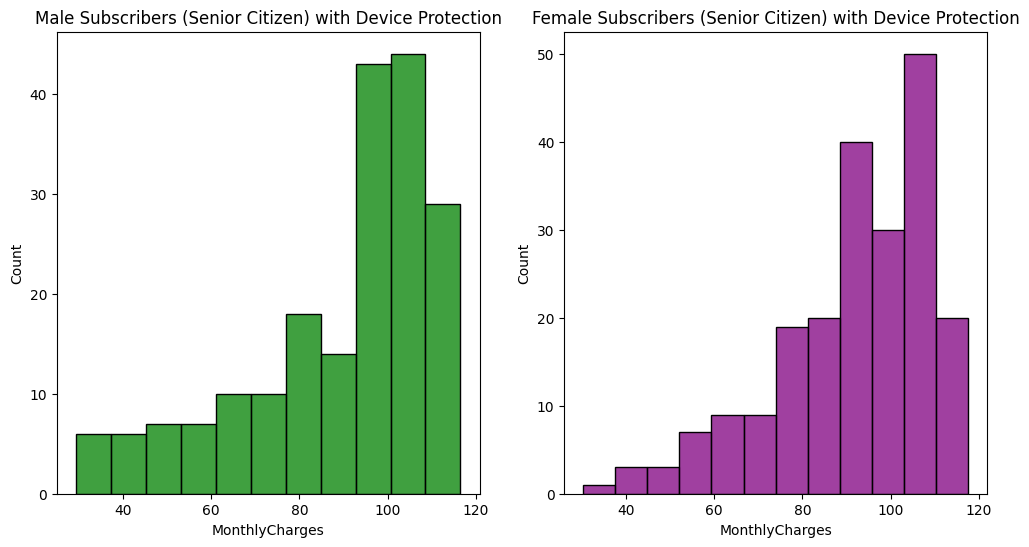

In [59]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Create a histogram of the 'MonthlyCharges' column for male customers
sns.histplot(data=df_filtered_device_male_senior, x='MonthlyCharges', color='green', ax=ax1)
ax1.set_title('Male Subscribers (Senior Citizen) with Device Protection')

# Create a histogram of the 'MonthlyCharges' column for female customers
sns.histplot(data=df_filtered_device_female_senior, x='MonthlyCharges', color='purple', ax=ax2)
ax2.set_title('Female Subscribers (Senior Citizen) with Device Protection')

# Show the plot
plt.show()

Based on the side-by-side comparison of the histograms, it appears that there are some differences and similarities in the distributions of monthly charges for male and female senior citizen subscribers with Device Protection.

For male subscribers, the highest count of around 45 is for monthly charges of approximately £105, while their second highest count of around 40 is for monthly charges of approximately £100.

For female subscribers, the highest count of around 50 is for monthly charges of approximately £105, while their second highest count of around 40 is for monthly charges of approximately £95.

These figures suggest that male subscribers have a slightly higher count when monthly charges are lower, while female subscribers have a higher count when monthly charges are higher for Device Protection. This could indicate that female subscribers are more willing to pay higher monthly charges for Device Protection than male subscribers.

### A Comparison of two histograms Total Male and Female Subscribers (Senior Citizens) with Streaming TV Service vs Monthly Charges

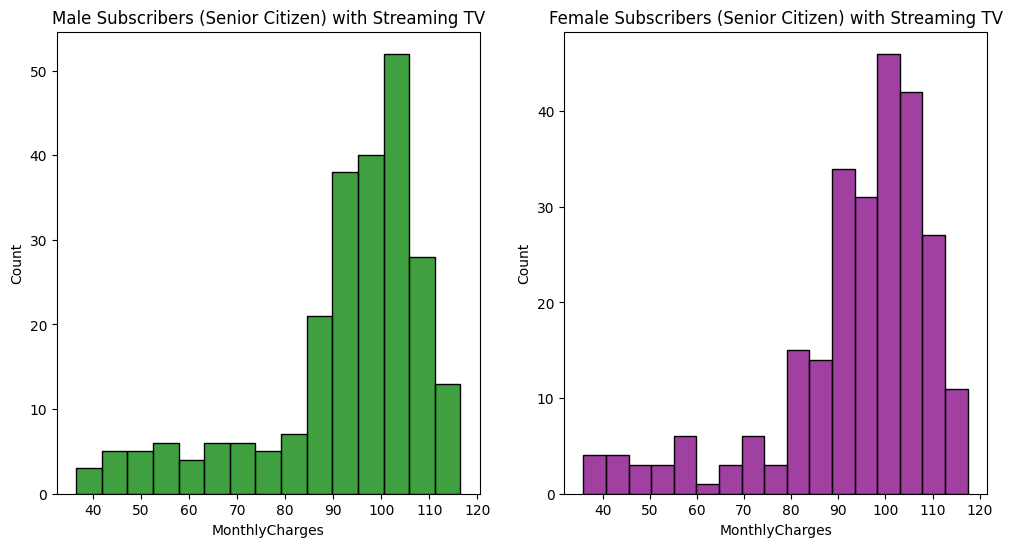

In [60]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Create a histogram of the 'MonthlyCharges' column for male customers
sns.histplot(data=df_filtered_streaming_male_senior, x='MonthlyCharges', color='green', ax=ax1)
ax1.set_title('Male Subscribers (Senior Citizen) with Streaming TV')

# Create a histogram of the 'MonthlyCharges' column for female customers
sns.histplot(data=df_filtered_streaming_female_senior, x='MonthlyCharges', color='purple', ax=ax2)
ax2.set_title('Female Subscribers (Senior Citizen) with Streaming TV')

# Show the plot
plt.show()

Based on the side-by-side comparison of the histograms, it appears that there are some differences and similarities in the distributions of monthly charges for male and female senior citizen subscribers with Streaming TV Service.

For male subscribers, the highest count of around 55 is for monthly charges of approximately £105, while their second highest count of around 40 is for monthly charges of approximately £100.

For female subscribers, the highest count of around 50 is for monthly charges of approximately £100, while their second highest count of around 40 is for monthly charges of approximately £105.

Looking at the overall distribution, the figures are quite low and this could indicate that Streaming TV Service isn't a popular service among both male and female senior subscribers. It is only when monthly charges are £100 and above that the count of subscribers increases for both male and female. With the right marketing and investment, this could would be a growth area for senior citizens as new Streaming TV customers.

### A Comparison of two histograms Total Male and Female Subscribers (Senior Citizens) with Paperless Billing vs Monthly Charges

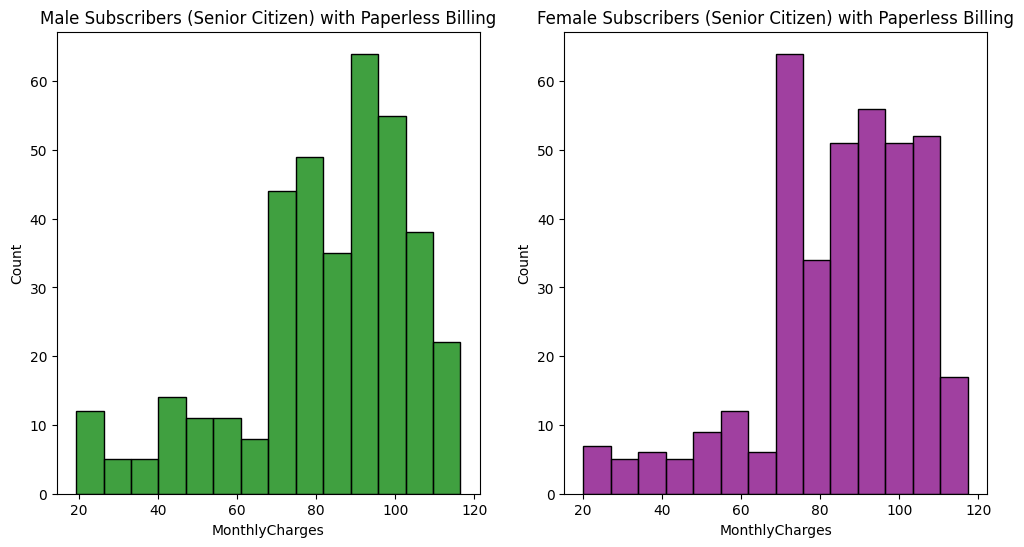

In [61]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Create a histogram of the 'MonthlyCharges' column for male customers
sns.histplot(data=df_filtered_paperless_male_senior, x='MonthlyCharges', color='green', ax=ax1)
ax1.set_title('Male Subscribers (Senior Citizen) with Paperless Billing')

# Create a histogram of the 'MonthlyCharges' column for female customers
sns.histplot(data=df_filtered_paperless_female_senior, x='MonthlyCharges', color='purple', ax=ax2)
ax2.set_title('Female Subscribers (Senior Citizen) with Paperless Billing')

# Show the plot
plt.show()

Based on the side-by-side comparison of the histograms, it appears that there are some differences and similarities in the distributions of monthly charges for male and female senior citizen subscribers with Paperless Billing.

For male subscribers, the highest count of around 65 is for monthly charges of approximately £95, while their second highest count of around 55 is for monthly charges of approximately £100.

For female subscribers, the highest count of around 65 is for monthly charges of approximately £75, while their second highest count of around 55 is for monthly charges of approximately £95.

These figures suggest that both male and female subscribers have similar distributions of monthly charges, but male seniors have a higher count with a higher Paperless Billing than female subscribers.

## Data Exploration - Total Charges

### Total Charges across the whole dataframe

In [62]:
total_charges_sum = df['TotalCharges'].sum()
print(total_charges_sum)

13880614.3


### Distribution of Total Charges across the whole dataframe

C:\Users\cheek\AppData\Local\Temp\ipykernel_21492\613034795.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df['TotalCharges'])


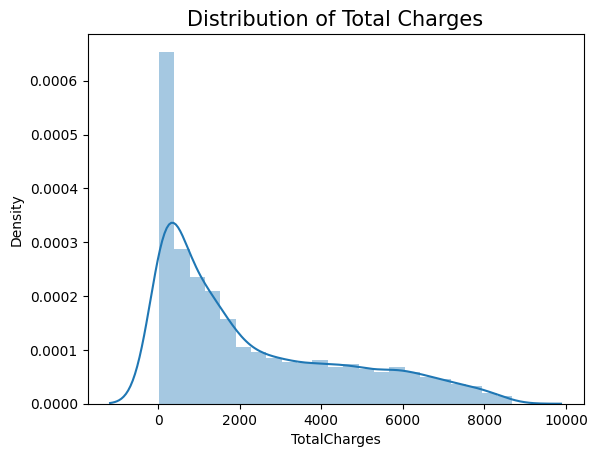

In [63]:
sns.distplot(a=df['TotalCharges'])
plt.title("Distribution of Total Charges", size=15)
plt.show()

### Heatmap of Total Charges across the whole dataframe by Gender

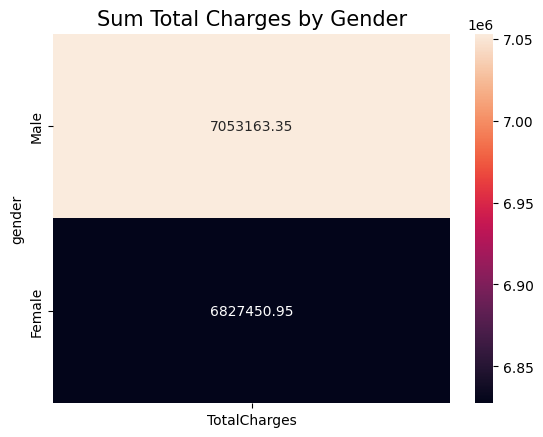

In [64]:
data = df.pivot_table(index='gender', values='TotalCharges', aggfunc='sum')
data = data.reindex(['Male', 'Female'])
sns.heatmap(data, annot=True, fmt='.2f')
plt.title("Sum Total Charges by Gender", size=15)
plt.show()

### Total Charges vs Online Backup 

In [76]:
total_charges_sum_by_online_backup = df.groupby('OnlineBackup')['TotalCharges'].sum()
print(total_charges_sum_by_online_backup)

OnlineBackup
No                     4850796.65
No internet service     863664.25
Yes                    8166153.40
Name: TotalCharges, dtype: float64


### Pie Chart to visualise Percentage of Total Charges vs Online Backup 

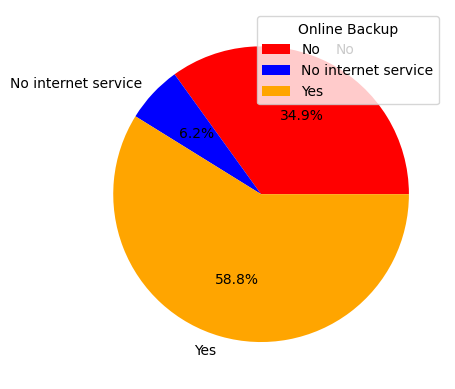

In [79]:
plt.pie(total_charges_sum_by_online_backup.values, labels=total_charges_sum_by_online_backup.index, colors=['red', 'blue', 'orange'], autopct='%1.1f%%')
plt.legend(title='Online Backup')
plt.show()

### Total Charges vs Phone Service 

In [73]:
total_charges_sum_by_phone = df.groupby('PhoneService')['TotalCharges'].sum()
print(total_charges_sum_by_phone)

PhoneService
No       885438.1
Yes    12995176.2
Name: TotalCharges, dtype: float64


### Pie Chart to visualise Percentage of Total Charges vs Phone Service

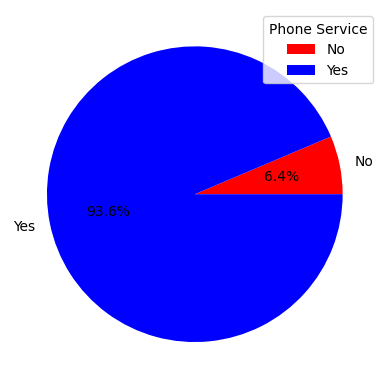

In [75]:
plt.pie(total_charges_sum_by_phone.values, labels=total_charges_sum_by_phone.index, colors=['red', 'blue'], autopct='%1.1f%%')
plt.legend(title='Phone Service')
plt.show()

### Total Charges vs Streaming Movies 

In [77]:
total_charges_sum_by_movies = df.groupby('StreamingMovies')['TotalCharges'].sum()
print(total_charges_sum_by_movies)

StreamingMovies
No                     4059706.95
No internet service     863664.25
Yes                    8957243.10
Name: TotalCharges, dtype: float64


### Pie Chart to visualise Percentage of Total Charges vs Streaming Movies

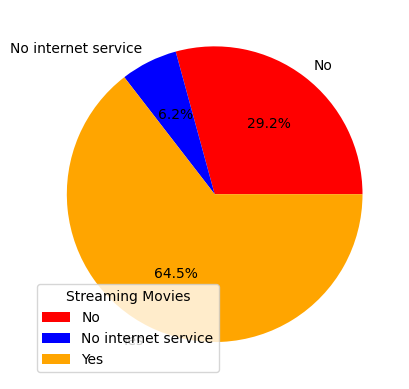

In [80]:
plt.pie(total_charges_sum_by_movies.values, labels=total_charges_sum_by_movies.index, colors=['red', 'blue', 'orange'], autopct='%1.1f%%')
plt.legend(title='Streaming Movies')
plt.show()

### Total Charges vs Streaming TV 

In [81]:
total_charges_sum_by_tv = df.groupby('StreamingTV')['TotalCharges'].sum()
print(total_charges_sum_by_tv)

StreamingTV
No                     4221854.85
No internet service     863664.25
Yes                    8795095.20
Name: TotalCharges, dtype: float64


### Pie Chart to visualise Percentage of Total Charges vs Streaming TV

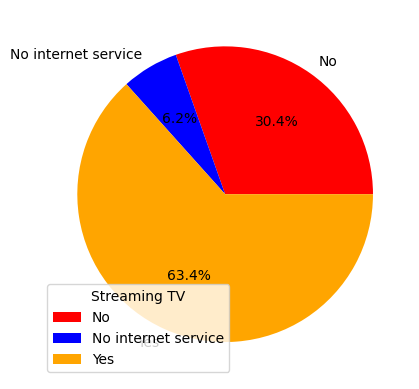

In [82]:
plt.pie(total_charges_sum_by_tv.values, labels=total_charges_sum_by_tv.index, colors=['red', 'blue', 'orange'], autopct='%1.1f%%')
plt.legend(title='Streaming TV')
plt.show()

### Total Charges vs Multiple Lines 

In [83]:
total_charges_sum_by_mlines = df.groupby('MultipleLines')['TotalCharges'].sum()
print(total_charges_sum_by_mlines)

MultipleLines
No                  3855355.1
No phone service     885438.1
Yes                 9139821.1
Name: TotalCharges, dtype: float64


### Pie Chart to visualise Percentage of Total Charges vs Multiple Lines

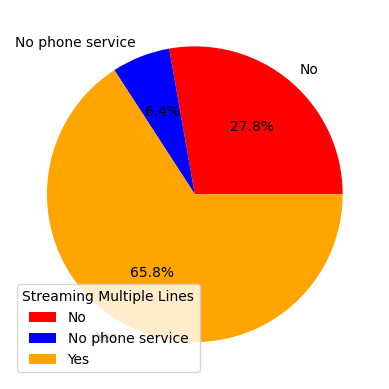

In [84]:
plt.pie(total_charges_sum_by_mlines.values, labels=total_charges_sum_by_mlines.index, colors=['red', 'blue', 'orange'], autopct='%1.1f%%')
plt.legend(title='Streaming Multiple Lines')
plt.show()

### Total Charges vs Churn 

In [86]:
total_charges_sum_by_churn = df.groupby('Churn')['TotalCharges'].sum()
print(total_charges_sum_by_churn)

Churn
No     11384851.4
Yes     2495762.9
Name: TotalCharges, dtype: float64


### Pie Chart to visualise Percentage of Total Charges vs Churn

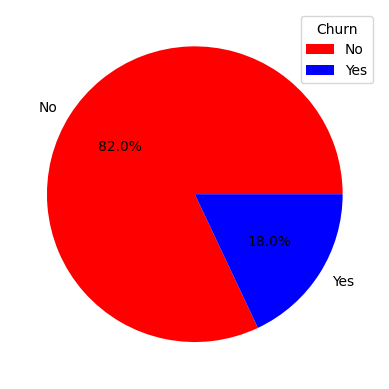

In [87]:
plt.pie(total_charges_sum_by_churn.values, labels=total_charges_sum_by_churn.index, colors=['red', 'blue'], autopct='%1.1f%%')
plt.legend(title='Churn')
plt.show()

### Total Charges vs Senior Citizen or Non Senior Citizen Subscriber

In [90]:
total_charges_sum_by_senior_citizen = df.groupby('SeniorCitizen')['TotalCharges'].sum()
total_charges_sum_by_senior_citizen = total_charges_sum_by_senior_citizen.rename(index={0: 'Not a Senior Citizen', 1: 'Yes a Senior Citizen'})
print(total_charges_sum_by_senior_citizen)

SeniorCitizen
Not a Senior Citizen    11143445.1
Yes a Senior Citizen     2737169.2
Name: TotalCharges, dtype: float64


### Pie Chart to visualise Percentage of Total Charges vs Senior Citizen or Non Senior Citizen Subscriber

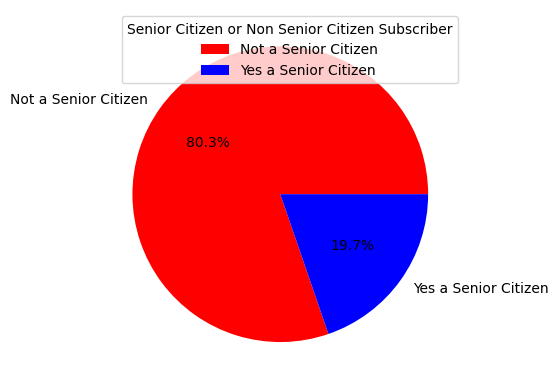

In [91]:
plt.pie(total_charges_sum_by_senior_citizen.values, labels=['Not a Senior Citizen', 'Yes a Senior Citizen'], colors=['red', 'blue'], autopct='%1.1f%%')
plt.legend(title='Senior Citizen or Non Senior Citizen Subscriber')
plt.show()

### Total Charges vs Device Protection vs Contract

In [93]:
total_charges_sum_by_device_contract = df.groupby(['DeviceProtection','Contract'])['TotalCharges'].sum()
print(total_charges_sum_by_device_contract)

DeviceProtection     Contract      
No                   Month-to-month    2552177.65
                     One year          1374379.10
                     Two year           914177.10
No internet service  Month-to-month      83778.60
                     One year           190183.20
                     Two year           589702.45
Yes                  Month-to-month    1903370.40
                     One year          2343536.75
                     Two year          3929309.05
Name: TotalCharges, dtype: float64


### Bar Chart to visualise Percentage of Total Charges vs Contract

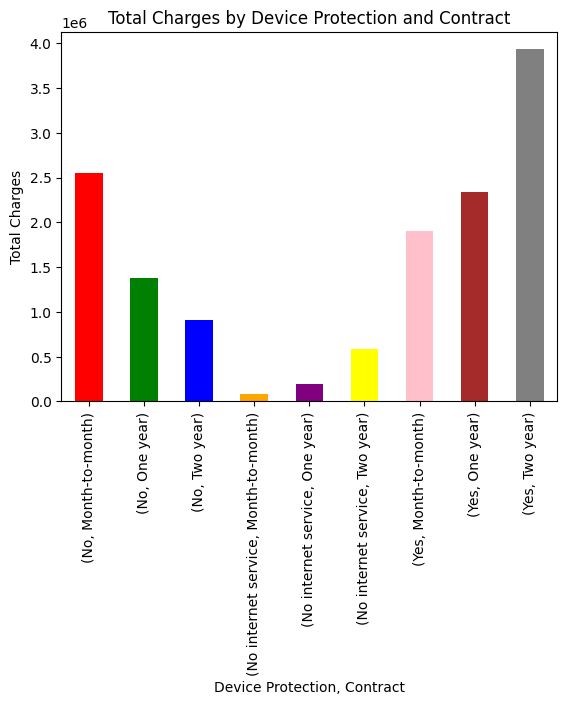

In [96]:
fig, ax = plt.subplots()
ax.set_title('Total Charges by Device Protection and Contract')
total_charges_sum_by_device_contract.plot(kind='bar', ax=ax, color=['red', 'green', 'blue', 'orange', 'purple', 'yellow', 'pink', 'brown', 'gray'])
ax.set_xlabel('Device Protection, Contract')
ax.set_ylabel('Total Charges')
plt.show()

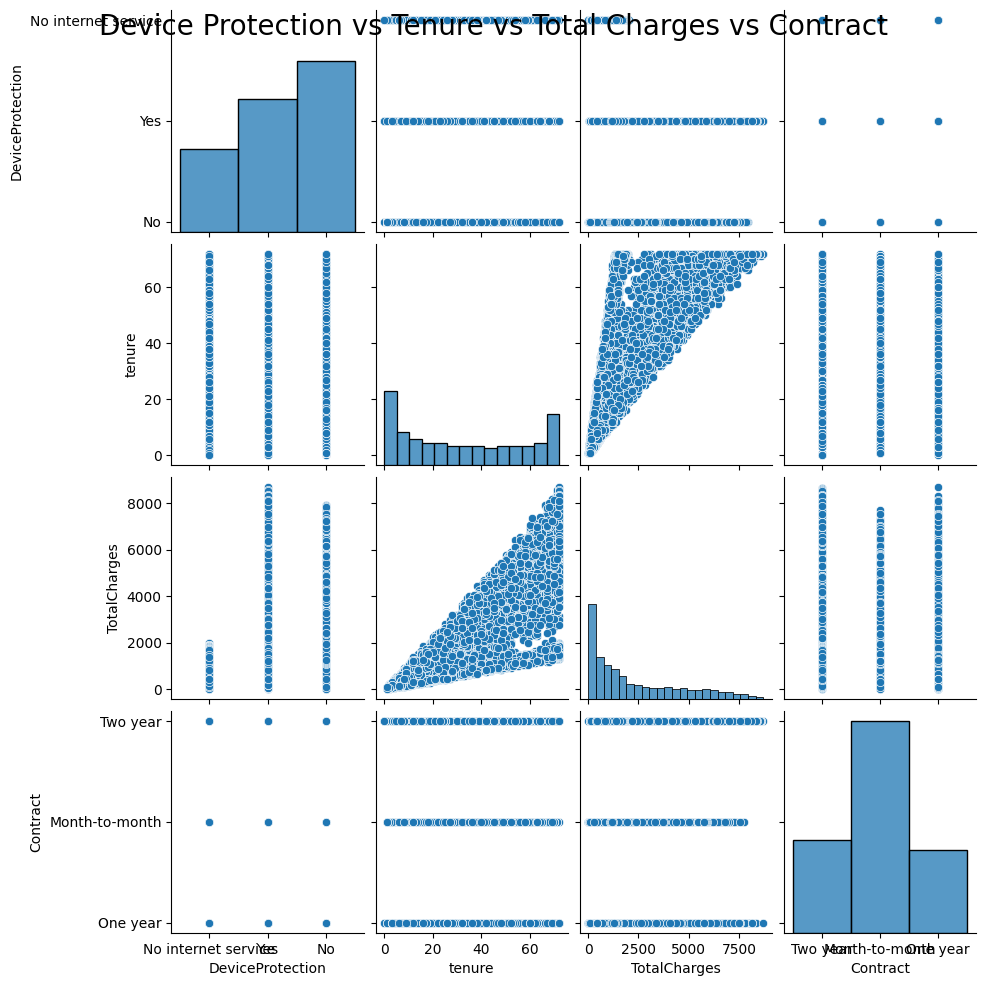

In [71]:
sns.pairplot(data=df, vars=['DeviceProtection', 'tenure', 'TotalCharges', 'Contract'])
plt.suptitle("Device Protection vs Tenure vs Total Charges vs Contract", size=20)
plt.show()